# 1 - Importação das bibliotecas


In [ ]:
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
library(tidyverse)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Loading required package: viridisLite



## 2 - Carregar os dados

In [ ]:
olist_customers_dataset <- read_csv("/content/olist_customers_dataset.csv")
olist_orders_dataset <- read_csv("/content/olist_orders_dataset.csv")
olist_order_payments_dataset <- read_csv("/content/olist_order_payments_dataset.csv")

Customers = olist_customers_dataset
Orders = olist_orders_dataset
Payment = olist_order_payments_dataset

Rows: 99441 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): customer_id, customer_unique_id, customer_zip_code_prefix, customer...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 99441 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): order_id, customer_id, order_status
dttm (5): order_purchase_timestamp, order_approved_at, order_delivered_carri...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 103886 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): order_id, payment_type
dbl (3): payment_sequential, payment_installments, payment_value

ℹ Use `spec()` to retrieve t

# 3 - Análise Descritiva



### 3.1 - Visualizando os dados

##### Verificando as primeiras linhas dos datasets

In [ ]:
head(Customers)

customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
<chr>,<chr>,<chr>,<chr>,<chr>
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC


In [ ]:
tail(Customers)

customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
<chr>,<chr>,<chr>,<chr>,<chr>
7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,06703,cotia,SP


In [ ]:
head(Orders)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01


In [ ]:
tail(Orders)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>
880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [ ]:
head(Payment)

order_id,payment_sequential,payment_type,payment_installments,payment_value
<chr>,<dbl>,<chr>,<dbl>,<dbl>
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


In [ ]:
tail(Payment)

order_id,payment_sequential,payment_type,payment_installments,payment_value
<chr>,<dbl>,<chr>,<dbl>,<dbl>
7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [ ]:
# Unindo os dataframes
Olist_Customers <- merge(Customers, Orders, by = "customer_id", all.x = TRUE) %>%
                   merge(Payment, by = "order_id", all.x = TRUE)




In [ ]:
# Visualizar o resultado
head(Olist_Customers)

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>
1,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,credit_card,2,72.19
2,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,credit_card,3,259.83
3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,credit_card,5,216.87
4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,credit_card,2,25.78
5,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,credit_card,3,218.04
6,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06,1,boleto,1,34.59


In [ ]:
print(paste("O dataframe possui", nrow(Olist_Customers), "linhas e", ncol(Olist_Customers), "colunas."))

[1] "O dataframe possui 103887 linhas e 16 colunas."


In [ ]:
### Qual é o intervalo de datas no campo de Order_purchase?
print(paste('Date range:', min(Olist_Customers$order_purchase_timestamp), '-', max(Olist_Customers$order_purchase_timestamp)))

[1] "Date range: 2016-09-04 21:15:19 - 2018-10-17 17:30:18"


In [ ]:
### Utilizando a função str() para obter informações sobre o dataframe
str(Olist_Customers)

'data.frame':	103887 obs. of  16 variables:
 $ order_id                     : chr  "00010242fe8c5a6d1ba2dd792cb16214" "00018f77f2f0320c557190d7a144bdd3" "000229ec398224ef6ca0657da4fc703e" "00024acbcdf0a6daa1e931b038114c75" ...
 $ customer_id                  : chr  "3ce436f183e68e07877b285a838db11a" "f6dd3ec061db4e3987629fe6b26e5cce" "6489ae5e4333f3693df5ad4372dab6d3" "d4eb9395c8c0431ee92fce09860c5a06" ...
 $ customer_unique_id           : chr  "871766c5855e863f6eccc05f988b23cb" "eb28e67c4c0b83846050ddfb8a35d051" "3818d81c6709e39d06b2738a8d3a2474" "af861d436cfc08b2c2ddefd0ba074622" ...
 $ customer_zip_code_prefix     : chr  "28013" "15775" "35661" "12952" ...
 $ customer_city                : chr  "campos dos goytacazes" "santa fe do sul" "para de minas" "atibaia" ...
 $ customer_state               : chr  "RJ" "SP" "MG" "SP" ...
 $ order_status                 : chr  "delivered" "delivered" "delivered" "delivered" ...
 $ order_purchase_timestamp     : POSIXct, format: "2017-09-13 08:5

In [ ]:
### Utilizando a função summary() para obter um resumo estatístico do dataframe
summary(Olist_Customers)

   order_id         customer_id        customer_unique_id
 Length:103887      Length:103887      Length:103887     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 customer_zip_code_prefix customer_city      customer_state    
 Length:103887            Length:103887      Length:103887     
 Class :character         Class :character   Class :character  
 Mode  :character         Mode  :character   Mode  :character  
                                                               
                                                               
                                                               
                                                               
 order_status       orde

##### A média da coluna 'payment_value' está distante da mediana, provavelmente existe ouliers nessa coluna

### 3.2 - Detecçao de Outliers

In [ ]:
# Função para identificar outliers em uma variável
detect_outliers <- function(column) {
  if (is.numeric(column)) {
    Q1 <- quantile(column, 0.25, na.rm = TRUE)
    Q3 <- quantile(column, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    outliers <- column[(column < lower_bound) | (column > upper_bound)]
    return(outliers)
  } else {
    return(NULL)
  }
}

# Listando para armazenar os outliers de cada variável
outliers_list <- list()

# Loop através das variáveis numéricas
for (col in names(Olist_Customers)) {
  if (!(col %in% c())) {
    outliers <- detect_outliers(Olist_Customers[[col]])
    if (!is.null(outliers) && length(outliers) > 0) {
      outliers_list[[col]] <- outliers
    }
  }
}

# Criando uma lista de dataframes com os outliers
outliers_df <- stack(outliers_list)

# Renomeando as colunas
colnames(outliers_df) <- c("Outlier", "Variable")

# Contando quantos outliers cada variável possui
contagem_outliers <- table(outliers_df$Variable)

# Criando um DataFrame com a contagem de outliers para cada variável
contagem_outliers_df <- data.frame(Variavel = names(contagem_outliers), Quantidade_de_Outliers = as.numeric(contagem_outliers))

# Exibindo a contagem de outliers para cada variável
print(contagem_outliers_df)

              Variavel Quantidade_de_Outliers
1   payment_sequential                   4527
2 payment_installments                   6314
3        payment_value                   7982


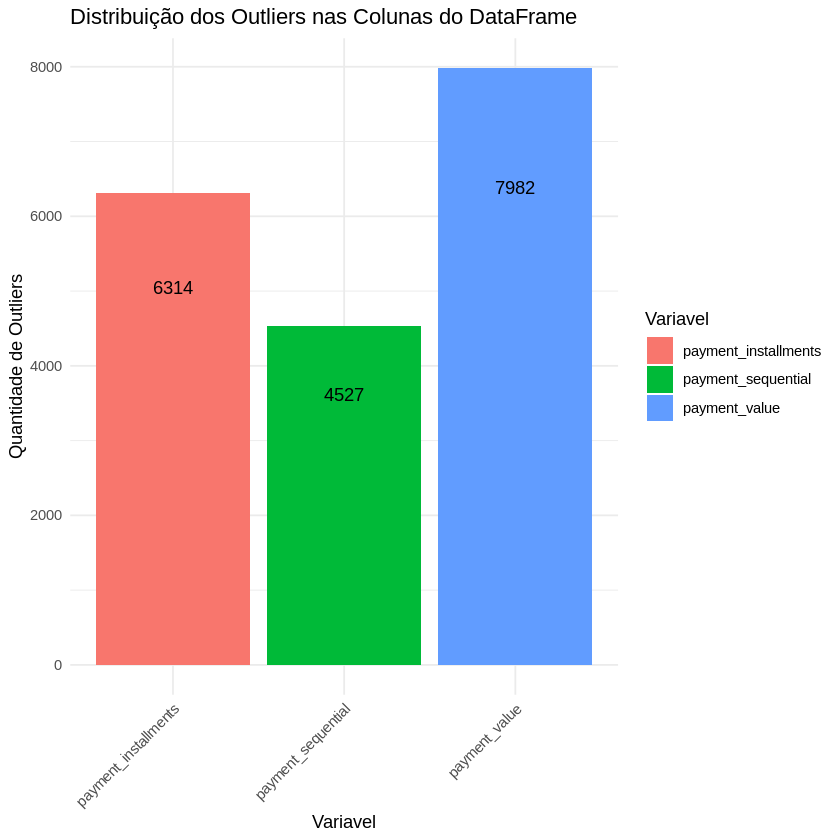

In [ ]:
# Criando um gráfico de barras com ggplot2
grafico <- ggplot(contagem_outliers_df, aes(x = Variavel, y = Quantidade_de_Outliers, fill = Variavel, label = Quantidade_de_Outliers)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribuição dos Outliers nas Colunas do DataFrame",
       y = "Quantidade de Outliers") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(position = position_stack(vjust = 0.8))


print(grafico)


Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


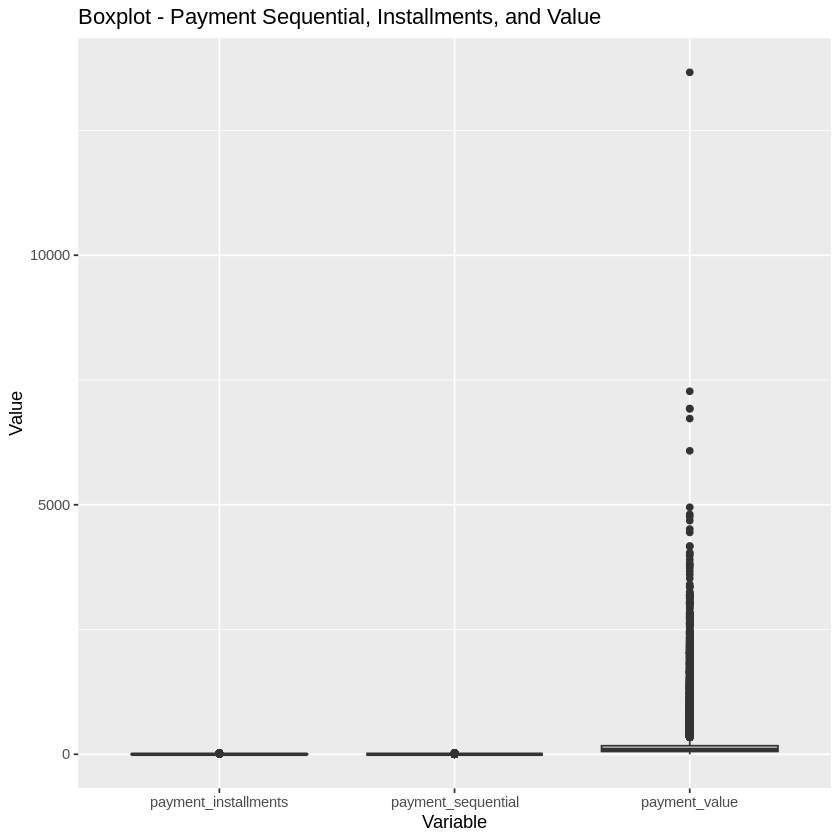

In [ ]:
# Selecionando apenas as colunas relevantes do seu dataframe
numeric_data <- Olist_Customers %>%
  select(payment_sequential, payment_installments, payment_value)

# Mudando o formato dos dados para o gráfico
numeric_data_long <- numeric_data %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value")

# Criando um boxplot único
boxplot_combined <- ggplot(data = numeric_data_long, aes(x = Variable, y = Value)) +
  geom_boxplot() +
  ggtitle("Boxplot - Payment Sequential, Installments, and Value")


print(boxplot_combined)

Há um outlier no payment_value estranho no dataset, vamos verificar

### 4.3 - Identificando o motivo do Outlier

In [ ]:
# Baixando outros dataset para visualizar se foi erro na digitação

olist_orders_items_dataset <- read_csv("/content/olist_order_items_dataset.csv")
olist_products_dataset <- read_csv("/content/olist_products_dataset.csv")

items = olist_orders_items_dataset
products = olist_products_dataset

Rows: 112650 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): order_id, product_id, seller_id
dbl  (3): order_item_id, price, freight_value
dttm (1): shipping_limit_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 32951 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product_id, product_category_name
dbl (7): product_name_lenght, product_description_lenght, product_photos_qty...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Verificando os maiores valores de compras
Max_payment <- Olist_Customers %>%
  arrange(desc(payment_value))

head(Max_payment)

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>
1,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,credit_card,1,13664.08
2,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,1,boleto,1,7274.88
3,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,1,credit_card,8,6929.31
4,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,1,boleto,1,6922.21
5,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,1,boleto,1,6726.66
6,2cc9089445046817a7539d90805e6e5a,05455dfa7cd02f13d132aa7a6a9729c6,4007669dec559734d6f53e029e360987,35501,divinopolis,MG,delivered,2017-11-24 11:03:35,2017-11-28 12:55:46,2017-12-06 11:52:14,2017-12-13 12:16:02,2017-12-22,1,boleto,1,6081.54


Agora tenho o id do pedido , irei unir os novos dataset com o de pedidos

In [ ]:
# Unindo os dataset
Olist_Orders <- Orders %>%
  inner_join(items, by = "order_id") %>%
  inner_join(products, by = "product_id")


head(Olist_Orders,8)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,⋯,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,⋯,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,⋯,118.70,22.76,perfumaria,29,178,1,400,19,13,19
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,⋯,159.90,19.22,automotivo,46,232,1,420,24,19,21
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,⋯,45.00,27.20,pet_shop,59,468,3,450,30,10,20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,⋯,19.90,8.72,papelaria,38,316,4,250,51,15,15
a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,⋯,147.90,27.36,automotivo,49,608,1,7150,65,10,65
136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NA,NA,2017-05-09,1,a1804276d9941ac0733cfd409f5206eb,⋯,49.90,16.05,NA,NA,NA,NA,600,35,35,15
6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1,4520766ec412348b8d4caa5e8a18c464,⋯,59.99,15.17,automotivo,59,956,1,50,16,16,17


In [ ]:
# Verificar os produtos do pedido
# Filtrar o pedido específico
order_id_especifico <- "03caa2c082116e1d31e67e9ae3700499"

order_outlier <- Olist_Orders %>%
  filter(order_id == order_id_especifico)


head(order_outlier,10)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,⋯,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,2,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,3,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,4,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,5,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,6,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,7,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,8,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16


Foram feitos 8 pedidos de um mesmo produto de telefonia fixa, talvez o preço do produto esteja errado nesse pedido, vou filtrar o produto para vê-lo em outros pedidos

In [ ]:
# ID do produto desejado
produto_desejado <- "5769ef0a239114ac3a854af00df129e4"

# Filtrar os pedidos que possuem o produto desejado
pedidos_com_produto <- Olist_Orders %>%
  filter(product_id == produto_desejado)


head(pedidos_com_produto,10)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,⋯,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,2,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,3,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,4,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,5,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,6,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,7,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,8,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16


Infelizmente o produto só foi vendido nesse pedido, vou verificar se outros produtos nessa categoria de telefonia fixa possuem um preço equivalente a esse

In [ ]:
# Criando um dataframe apenas com os dados de 'telefonia_fixa'
Ctg_telefonia_fixa <- Olist_Orders %>%
  filter(product_category_name == 'telefonia_fixa') %>%
  arrange(desc(price))


head(Ctg_telefonia_fixa)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,⋯,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,1,19936fa4f614ee0590d3b77ac83fd648,⋯,1790,28.72,telefonia_fixa,34,1016,2,1100,20,16,20
736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,2,19936fa4f614ee0590d3b77ac83fd648,⋯,1790,28.72,telefonia_fixa,34,1016,2,1100,20,16,20
736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,3,19936fa4f614ee0590d3b77ac83fd648,⋯,1790,28.72,telefonia_fixa,34,1016,2,1100,20,16,20
736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,4,19936fa4f614ee0590d3b77ac83fd648,⋯,1790,28.72,telefonia_fixa,34,1016,2,1100,20,16,20
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16
03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,2,5769ef0a239114ac3a854af00df129e4,⋯,1680,28.01,telefonia_fixa,39,2493,3,750,16,16,16


Da para perceber que não foi um erro de digitação a outros produtos nessa categoria com valores equivalentes

In [ ]:
mean(Ctg_telefonia_fixa$price)

[1] 225.6932

In [ ]:
median(Ctg_telefonia_fixa$price)

[1] 64.485

In [ ]:
max(Ctg_telefonia_fixa$price)

[1] 1790

Bem, não foi um erro de digitação, o motivo do outlier foi apenas 8 compras de um produto de telefonia fixa de alto valor(1680), digo de alto valor devido a média e mediana nesses produtos tem valores abaixo de 300 reais

### 4.4 - Valores Nulos

#### voltemos ao nosso dataset padrão

In [ ]:
### Quantidade de valores nulos
colSums(is.na(Olist_Customers))

order_id                   customer_id 
                            0                             0 
           customer_unique_id      customer_zip_code_prefix 
                            0                             0 
                customer_city                customer_state 
                            0                             0 
                 order_status      order_purchase_timestamp 
                            0                             0 
            order_approved_at  order_delivered_carrier_date 
                          175                          1888 
order_delivered_customer_date order_estimated_delivery_date 
                         3132                             0 
           payment_sequential                  payment_type 
                            1                             1 
         payment_installments                 payment_value 
                            1                             1

In [ ]:
# Fazendo unpack de linhas e colunas
rows <- nrow(Olist_Customers)
columns <- ncol(Olist_Customers)

# Percentual de dados faltantes
percentual_nan <- ((colSums(is.na(Olist_Customers))/rows) * 100)
percentual_nan <- round(percentual_nan, 2)


print(percentual_nan)

                     order_id                   customer_id 
                         0.00                          0.00 
           customer_unique_id      customer_zip_code_prefix 
                         0.00                          0.00 
                customer_city                customer_state 
                         0.00                          0.00 
                 order_status      order_purchase_timestamp 
                         0.00                          0.00 
            order_approved_at  order_delivered_carrier_date 
                         0.17                          1.82 
order_delivered_customer_date order_estimated_delivery_date 
                         3.01                          0.00 
           payment_sequential                  payment_type 
                         0.00                          0.00 
         payment_installments                 payment_value 
                         0.00                          0.00 


Existe um valor vazio na coluna payment_value, vou precisar remover a linha por ser fundamental na análise ela possuir esse valor

### 4.5 - Verificando as linhas duplicadas

In [ ]:
# Verificando se há linhas duplicadas no dataframe 'Olist_Customers'
duplicated_rows <- Olist_Customers[duplicated(Olist_Customers), ]


print(duplicated_rows)

 [1] order_id                      customer_id                  
 [3] customer_unique_id            customer_zip_code_prefix     
 [5] customer_city                 customer_state               
 [7] order_status                  order_purchase_timestamp     
 [9] order_approved_at             order_delivered_carrier_date 
[11] order_delivered_customer_date order_estimated_delivery_date
[13] payment_sequential            payment_type                 
[15] payment_installments          payment_value                
<0 rows> (or 0-length row.names)


Nenhuma linha duplicada no dataset

### 4.6 - Quantidade de valores únicos por coluna

In [ ]:
# Criar um dataframe vazio para armazenar os resultados
contagem <- data.frame(Variavel = character(), Contagens_Distintas = numeric(), stringsAsFactors = FALSE)

# Calcular a contagem de valores distintos e armazenar no dataframe 'contagem'
for (coluna in names(Olist_Customers)) {

  dados <- data.frame(Variavel = coluna, Contagens_Distintas = length(unique(Olist_Customers[[coluna]])), stringsAsFactors = FALSE)
  contagem <- rbind(contagem, dados)
}


print(contagem)

                        Variavel Contagens_Distintas
1                       order_id               99441
2                    customer_id               99441
3             customer_unique_id               96096
4       customer_zip_code_prefix               14994
5                  customer_city                4119
6                 customer_state                  27
7                   order_status                   8
8       order_purchase_timestamp               98875
9              order_approved_at               90734
10  order_delivered_carrier_date               81019
11 order_delivered_customer_date               95665
12 order_estimated_delivery_date                 459
13            payment_sequential                  30
14                  payment_type                   6
15          payment_installments                  25
16                 payment_value               29078


# 5 - Preparando os dados

In [ ]:
# Remover linhas com valores NA na coluna 'payment_value'
Olist_Customers <- Olist_Customers[complete.cases(Olist_Customers$payment_value), ]


### 5.1 - Eliminando colunas desnecessárias

In [ ]:
Olist_Clean <- Olist_Customers %>%
  select(-customer_id,
         -customer_zip_code_prefix,
         -customer_city,
         -customer_state,
         -order_status,
         -order_approved_at,
         -order_delivered_carrier_date,
         -order_delivered_customer_date,
         -order_estimated_delivery_date,
         -payment_sequential,
         -payment_type,
         -payment_installments)

### 5.2 - Ajustando as colunas de Data e Hora

In [ ]:
Olist_Clean <- Olist_Clean %>%
  mutate(order_purchase_date = as.Date(order_purchase_timestamp),
         order_purchase_hour = format(order_purchase_timestamp, "%H:%M:%S")) %>%
  select(-order_purchase_timestamp, -order_purchase_hour )

In [ ]:
head(Olist_Clean)

,order_id,customer_unique_id,payment_value,order_purchase_date
,<chr>,<chr>,<dbl>,<date>
1,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,72.19,2017-09-13
2,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,259.83,2017-04-26
3,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,216.87,2018-01-14
4,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,25.78,2018-08-08
5,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,218.04,2017-02-04
6,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,34.59,2017-05-15


# 6 - Criando a tabela RFM

### 6.1 Recencia

In [ ]:
# Data mais recente da última compra no dataset
ultima_compra <- max(Olist_Clean$order_purchase_date)

# Para o dia de 'hoje', vou considerar 1 dia após a data da ultima compra
hoje <- ultima_compra + 1

# Calculo da recência (diferença em dias entre a data mais recente e cada compra) para cada cliente
recencia <- Olist_Clean %>%
  group_by(customer_unique_id) %>%
  summarize(recencia_dias = as.numeric(hoje - max(order_purchase_date))) %>%
  arrange(recencia_dias)


print(recencia)

# A tibble: 96,095 × 2
   customer_unique_id               recencia_dias
   <chr>                                    <dbl>
 1 87ab9fec999db8bd5774917de3cdf01c             1
 2 262e1f1e26e92e86375f86840b4ffd63             2
 3 af5454198a97379394cacf676e1e96cb            15
 4 634420a0ea42302205032ed44ac7fccc            17
 5 9bb92bebd4cb7511e1a02d5e50bc4655            19
 6 ba84da8c159659f116329563a0a981dd            22
 7 9c3af16efacb7aa06aa3bc674556c5d6            23
 8 08642cd329066fe11ec63293f714f2f8            28
 9 ef0103e9602d12594d19c2b666219bc1            31
10 c1ee153508c6b785b491443a95ff364e            35
# ℹ 96,085 more rows


### 6.2 - Frequência

In [ ]:
# Calculo da frequência (número de transações) para cada cliente
frequencia <- Olist_Clean %>%
  group_by(customer_unique_id) %>%
  summarize(Frequency = n()) %>%
  arrange(desc(Frequency))


print(frequencia)

# A tibble: 96,095 × 2
   customer_unique_id               Frequency
   <chr>                                <int>
 1 9a736b248f67d166d2fbb006bcb877c3        33
 2 8af7ac63b2efbcbd88e5b11505e8098a        29
 3 569aa12b73b5f7edeaa6f2a01603e381        26
 4 f9ae226291893fda10af7965268fb7f6        23
 5 2524dcec233c3766f2c2b22f69fd65f4        22
 6 24f12460aad399ba18f4ed2c2fbab65d        19
 7 6fbc7cdadbb522125f4b27ae9dee4060        19
 8 8d50f5eadf50201ccdcedfb9e2ac8455        17
 9 1d2435aa3b858d45c707c9fc25e18779        16
10 25ba76039a1caff121dfcb0d66e54780        15
# ℹ 96,085 more rows


### 6.3 - Monetário

In [ ]:
# Calculo da soma monetária (M) para cada cliente
monetario <- Olist_Clean %>%
  group_by(customer_unique_id) %>%
  summarize(Monetary = sum(payment_value)) %>%
  arrange(desc(Monetary))


head(monetario)

customer_unique_id,Monetary
<chr>,<dbl>
0a0a92112bd4c708ca5fde585afaa872,13664.08
46450c74a0d8c5ca9395da1daac6c120,9553.02
da122df9eeddfedc1dc1f5349a1a690c,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,7274.88
dc4802a71eae9be1dd28f5d788ceb526,6929.31
459bef486812aa25204be022145caa62,6922.21


### 6.4 - Ranqueando os dados

In [ ]:
# Ajustando a opção de formatação
options(scipen = 10)

In [ ]:
# Criando os valores de rank para recência, frequência e métrica monetária
recencia$Recency_Rank <- round(percent_rank(recencia$recencia_dias),2)
frequencia$Frequency_Rank <- round(1 - percent_rank(frequencia$Frequency),2)
monetario$Monetary_Rank <- round(1- percent_rank(monetario$Monetary),2)

In [ ]:
head(frequencia)

customer_unique_id,Frequency,Frequency_Rank
<chr>,<int>,<dbl>
9a736b248f67d166d2fbb006bcb877c3,33,0
8af7ac63b2efbcbd88e5b11505e8098a,29,0
569aa12b73b5f7edeaa6f2a01603e381,26,0
f9ae226291893fda10af7965268fb7f6,23,0
2524dcec233c3766f2c2b22f69fd65f4,22,0
24f12460aad399ba18f4ed2c2fbab65d,19,0


In [ ]:
rfm <- data.frame(customer_unique_id = recencia$customer_unique_id)

In [ ]:
# Unindo tudo em um dataframe 'rfm'
rfm <- rfm %>%
  inner_join(recencia, by = "customer_unique_id") %>%
  inner_join(frequencia, by = "customer_unique_id") %>%
  inner_join(monetario, by = "customer_unique_id")



In [ ]:
# Exiba o dataframe 'rfm'
head(rfm)

,customer_unique_id,recencia_dias,Recency_Rank,Frequency,Frequency_Rank,Monetary,Monetary_Rank
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,87ab9fec999db8bd5774917de3cdf01c,1,0,1,1.00,89.71,0.59
2,262e1f1e26e92e86375f86840b4ffd63,2,0,2,0.06,444.06,0.06
3,af5454198a97379394cacf676e1e96cb,15,0,3,0.01,592.65,0.04
4,634420a0ea42302205032ed44ac7fccc,17,0,2,0.06,160.76,0.31
5,9bb92bebd4cb7511e1a02d5e50bc4655,19,0,1,1.00,137.03,0.39
6,ba84da8c159659f116329563a0a981dd,22,0,3,0.01,283.89,0.12


### 6.5 - Agrupando os dados

In [ ]:
bins <- c(0, 0.5, 1)


In [ ]:
names <- c(1, 2)

In [ ]:
final <- data.frame(customer_unique_id = rfm$customer_unique_id)

In [ ]:
# Criando as variáveis 'frequency', 'recency' e 'monetary'
final$recency <- cut(rfm$Recency_Rank, breaks = bins, labels = names, include.lowest = TRUE)
final$frequency <- cut(rfm$Frequency_Rank, breaks = bins, labels = names, include.lowest = TRUE)
final$monetary <- cut(rfm$Monetary_Rank, breaks = bins, labels = names, include.lowest = TRUE)


In [ ]:
# Convertendo as variáveis para tipo 'character'
final$frequency <- as.character(final$frequency)
final$recency <- as.character(final$recency)
final$monetary <- as.character(final$monetary)

In [ ]:
# Criando a variável 'rec_freq_mone'
final$rec_freq_mone <- paste(final$recency, final$frequency, final$monetary, sep = "")


In [ ]:
# Adicionando a variável 'rec_freq_monet' ao DataFrame original 'rfm'
rfm$rec_freq_monet <- final$rec_freq_mone

In [ ]:
head(rfm)

,customer_unique_id,recencia_dias,Recency_Rank,Frequency,Frequency_Rank,Monetary,Monetary_Rank,rec_freq_monet
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,87ab9fec999db8bd5774917de3cdf01c,1,0,1,1.00,89.71,0.59,122
2,262e1f1e26e92e86375f86840b4ffd63,2,0,2,0.06,444.06,0.06,111
3,af5454198a97379394cacf676e1e96cb,15,0,3,0.01,592.65,0.04,111
4,634420a0ea42302205032ed44ac7fccc,17,0,2,0.06,160.76,0.31,111
5,9bb92bebd4cb7511e1a02d5e50bc4655,19,0,1,1.00,137.03,0.39,121
6,ba84da8c159659f116329563a0a981dd,22,0,3,0.01,283.89,0.12,111


# 7 - Criando a segmentação de clientes

### 7.1 - Dicionário dos segmentos



```
Rank, Customer Category,   Description
111,  Champion,           "Alta recência, alta frequência e alta contribuição monetária."
112,  Loyal,              "Alta recência, alta frequência e contribuição monetária baixa."
121,  Loyal Spenders,     "Alta recência, frequência baixa e alta contribuição monetária."
122,  New Customers,      "Alta recência, frequência baixa e contribuição monetária baixa."
211,  To be retained,     "Baixa recência, alta frequência e alta contribuição monetária."
212,  At- Risk,           "Alta frequência e valor monetário, mas com recência muito baixa"
221,  Slipping Away,      "Baixa recência, frequência baxa e alta contribuição monetária."
222,  Lost,               "Baixa recência, frequência baixa e baixa contribuição monetária."
```


In [ ]:
# Mapeamentos
mapping <- c(
  "111" = "Champion",
  "112" = "Loyal",
  "211" = "To be retained",
  "121" = "Loyal Spenders",
  "122" = "New customers",
  "221" = "Slipping Away",
  "212" = "At-risk",
  "222" = "Lost"

)

In [ ]:
# Renomeando os valores na coluna rec_freq_monet
rfm <- rfm %>%
  mutate(rec_freq_monet = recode(rec_freq_monet, !!!mapping))


In [ ]:

# Renomeando a coluna rec_freq_monet
rfm <- rfm %>%
  rename(customer_category = rec_freq_monet)


In [ ]:
head(rfm)

,customer_unique_id,recencia_dias,Recency_Rank,Frequency,Frequency_Rank,Monetary,Monetary_Rank,customer_category
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,87ab9fec999db8bd5774917de3cdf01c,1,0,1,1.00,89.71,0.59,New customers
2,262e1f1e26e92e86375f86840b4ffd63,2,0,2,0.06,444.06,0.06,Champion
3,af5454198a97379394cacf676e1e96cb,15,0,3,0.01,592.65,0.04,Champion
4,634420a0ea42302205032ed44ac7fccc,17,0,2,0.06,160.76,0.31,Champion
5,9bb92bebd4cb7511e1a02d5e50bc4655,19,0,1,1.00,137.03,0.39,Loyal Spenders
6,ba84da8c159659f116329563a0a981dd,22,0,3,0.01,283.89,0.12,Champion


### 7.2 - Salvando os novos Datasets em csv

In [ ]:
# Realize o join entre as tabelas usando a chave customer_unique_id para criar a tabela mestre
df_master <- Olist_Customers %>%
  left_join(Olist_Orders, by = "customer_id") %>%
  left_join(rfm, by = "customer_unique_id")


head(df_master)

Warning message in left_join(., Olist_Orders, by = "customer_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 14 of `x` matches multiple rows in `y`.
ℹ Row 84986 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


,order_id.x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status.x,order_purchase_timestamp.x,order_approved_at.x,order_delivered_carrier_date.x,⋯,product_length_cm,product_height_cm,product_width_cm,recencia_dias,Recency_Rank,Frequency,Frequency_Rank,Monetary,Monetary_Rank,customer_category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,⋯,28,9,14,400,0.75,1,1.00,72.19,0.69,Lost
2,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,⋯,50,30,40,395,0.74,2,0.06,284.56,0.12,To be retained
3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,⋯,33,13,33,277,0.52,1,1.00,216.87,0.19,Slipping Away
4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,⋯,16,10,15,71,0.04,1,1.00,25.78,0.98,New customers
5,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,⋯,35,40,30,621,0.99,1,1.00,218.04,0.19,Slipping Away
6,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,⋯,24,8,15,521,0.90,1,1.00,34.59,0.94,Lost


In [ ]:
# Salvando o dataframe como um arquivo CSV
write.csv(rfm, "rfm.csv", row.names = FALSE)

In [ ]:
# Salvando o dataframe  como um arquivo CSV
write.csv(df_master, "df_master.csv", row.names = FALSE)